<p align="center">
  <img src="https://raw.githubusercontent.com/pachecowillians/svg-icons/24b0ca90f467a751be9f0e7e5fa50801f89e4d17/img/diabetes.svg" alt="Diabetes" width="100px">
</p>

Predictive analysis of individuals' health, specifically focusing on determining the presence or absence of diabetes. The notebook utilizes machine learning techniques and a dataset containing relevant health indicators such as gender, BMI, hypertension, and age. By training a classification model and evaluating its performance, valuable insights can be gained regarding the predictive factors associated with diabetes.

In [151]:
# Importing the pandas library
import pandas as pd

In [152]:
# Loading the Wine Dataset
ds = pd.read_csv('dataset/diabetes_prediction_dataset.csv')

# Displaying the dataset
ds.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [153]:
def generateIdToColumn(column):
    # Get the distinct values from the column
    unique_values = column.unique()

    # Create a mapping dictionary for the distinct values
    mapping_gender = {valor: index for index, valor in enumerate(unique_values)}

    # Replace the values in the column with the corresponding number
    column = column.map(mapping_gender)

    return column

In [154]:
# Converting the 'gender' column to numerical values using the 'generateIdToColumn' function
ds['gender'] = generateIdToColumn(ds['gender'])

# Displaying the first few rows of the DataFrame after the conversion
ds.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0


In [155]:
# Converting the 'smoking_history' column to numerical values using the 'generateIdToColumn' function
ds['smoking_history'] = generateIdToColumn(ds['smoking_history'])

# Displaying the first few rows of the DataFrame after the conversion
ds.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0


In [156]:
def normalize(data):
    normalized_data = (data - data.mean()) / data.std()
    return normalized_data

In [157]:
ds['age'] = normalize(ds['age'])
ds['bmi'] = normalize(ds['bmi'])
ds['HbA1c_level'] = normalize(ds['HbA1c_level'])
ds['blood_glucose_level'] = normalize(ds['blood_glucose_level'])
ds.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1.692695,0,1,0,-0.321054,1.001701,0.047704,0
1,0,0.538004,0,0,1,-0.000116,1.001701,-1.426203,0
2,1,-0.616688,0,0,0,-0.000116,0.161107,0.489876,0
3,0,-0.261398,0,0,2,-0.583229,-0.492688,0.416181,0
4,1,1.515050,1,1,2,-1.081965,-0.679486,0.416181,0


In [158]:
# Splitting the dataset into goal (target variable) and predict (feature variables)
goal = ds['diabetes']
predict = ds.drop('diabetes', axis=1)

In [159]:
# Importing the train_test_split function
from sklearn.model_selection import train_test_split

In [160]:
# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(predict, goal, test_size=0.3)

In [161]:
# Printing the shapes of the datasets
print(ds.shape, x_train.shape, x_test.shape)

(100000, 9) (70000, 8) (30000, 8)


In [162]:
import warnings

warnings.filterwarnings('ignore')

from keras.models import Sequential
from keras.layers import Dense

In [163]:
# Creating an instance of the ExtraTreesClassifier model
model = Sequential()
model.add(Dense(units=3, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=1, activation='sigmoid'))

In [164]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [165]:
# Calculating the accuracy of the trained model on the test set
result = model.fit(x_train, y_train, epochs=200, batch_size=320, validation_data=(x_test, y_test))

Epoch 1/200


219/219 [==============================] - 1s 3ms/step - loss: 0.1356 - mae: 0.3329 - val_loss: 0.0976 - val_mae: 0.2625
Epoch 2/200
219/219 [==============================] - 0s 2ms/step - loss: 0.0798 - mae: 0.2202 - val_loss: 0.0661 - val_mae: 0.1855
Epoch 3/200
219/219 [==============================] - 0s 2ms/step - loss: 0.0588 - mae: 0.1653 - val_loss: 0.0526 - val_mae: 0.1470
Epoch 4/200
219/219 [==============================] - 0s 2ms/step - loss: 0.0485 - mae: 0.1361 - val_loss: 0.0451 - val_mae: 0.1256
Epoch 5/200
219/219 [==============================] - 0s 2ms/step - loss: 0.0423 - mae: 0.1178 - val_loss: 0.0403 - val_mae: 0.1114
Epoch 6/200
219/219 [==============================] - 0s 2ms/step - loss: 0.0384 - mae: 0.1053 - val_loss: 0.0373 - val_mae: 0.1003
Epoch 7/200
219/219 [==============================] - 0s 2ms/step - loss: 0.0360 - mae: 0.0959 - val_loss: 0.0356 - val_mae: 0.0923
Epoch 8/200
219/219 [==============================] - 0s 2ms/step - loss: 0.0346

In [166]:
import matplotlib.pyplot as plt

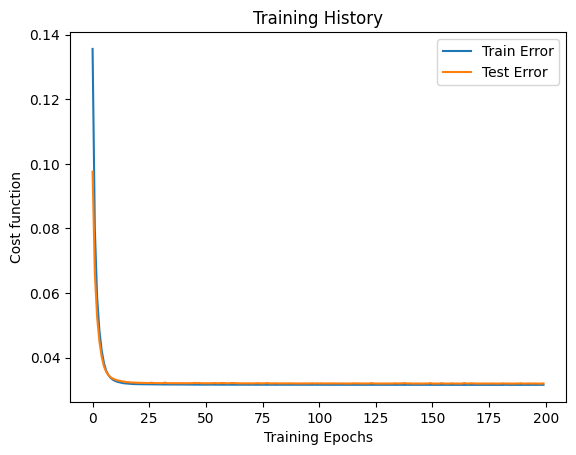

In [167]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Training History')
plt.ylabel('Cost function')
plt.xlabel('Training Epochs')
plt.legend(['Train Error', 'Test Error'])
plt.show()

In [168]:
# Importing the random module
import random

In [169]:
# Randomly sampling 10 rows from the DataFrame 'x_test'
random_sample = x_test.sample(n=10)

In [170]:
# Obtaining the corresponding 'y' values for the randomly sampled rows
random_sample_goal = y_test.loc[random_sample.index]

In [171]:
# Importing the NumPy library with the alias 'np'
import numpy as np

In [172]:
# Converting 'random_sample_goal' to a NumPy array
random_sample_goal = np.array(random_sample_goal)
print(random_sample_goal)

[0 0 0 0 0 1 1 0 0 0]


In [179]:
warnings.filterwarnings('ignore')

# Making predictions on the selected subset of test data
prediction = model.predict(random_sample)

print(prediction)

1/1 [==============================] - 0s 37ms/step
[[7.9302294e-03]
 [1.1807937e-03]
 [2.4436191e-03]
 [1.6776301e-02]
 [3.3678256e-03]
 [9.8984003e-01]
 [9.9991548e-01]
 [2.3593569e-02]
 [6.3130878e-02]
 [9.6704031e-04]]


In [180]:
offset = 0.2
binary_predictions = (prediction > offset).astype(int)
print(binary_predictions)

[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]]


In [181]:
binary_predictions = binary_predictions.flatten()
print(binary_predictions)

[0 0 0 0 0 1 1 0 0 0]


In [182]:
# Printing the comparison results
print(random_sample_goal == binary_predictions)

[ True  True  True  True  True  True  True  True  True  True]
